## California Housing Price Prediction

##### Importing Libraries

In [406]:
import pandas as pd 
import graphviz.backend as be
import numpy as np
from sklearn.datasets import fetch_california_housing


In [407]:
df = fetch_california_housing()

In [408]:
X = pd.DataFrame(df.data, columns=df.feature_names)

In [409]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [410]:
Y = pd.DataFrame(df.target, columns=['MedHouseVal'])

In [411]:
Y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [412]:
X.shape, Y.shape

((20640, 8), (20640, 1))

In [413]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [414]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [415]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3, random_state=42)

In [416]:
reg.fit(X_train,Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [417]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9012,5.8735,35.0,5.811639,1.056662,1521.0,2.329250,34.11,-118.63
2769,1.4688,8.0,10.000000,1.916667,63.0,2.625000,33.32,-115.98
1953,2.1603,28.0,4.808173,0.995460,2008.0,2.279228,38.74,-120.78
16897,4.7404,43.0,5.855140,1.009346,967.0,2.259346,37.58,-122.37
17866,3.2617,10.0,3.929142,1.051896,2032.0,2.027944,37.45,-121.92
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [418]:
Y_train

,MedHouseVal
9012,4.48100
2769,0.53800
1953,1.11300
16897,5.00001
17866,2.52200
...,...
11284,2.29200
11964,0.97800
5390,2.22100
860,2.83500


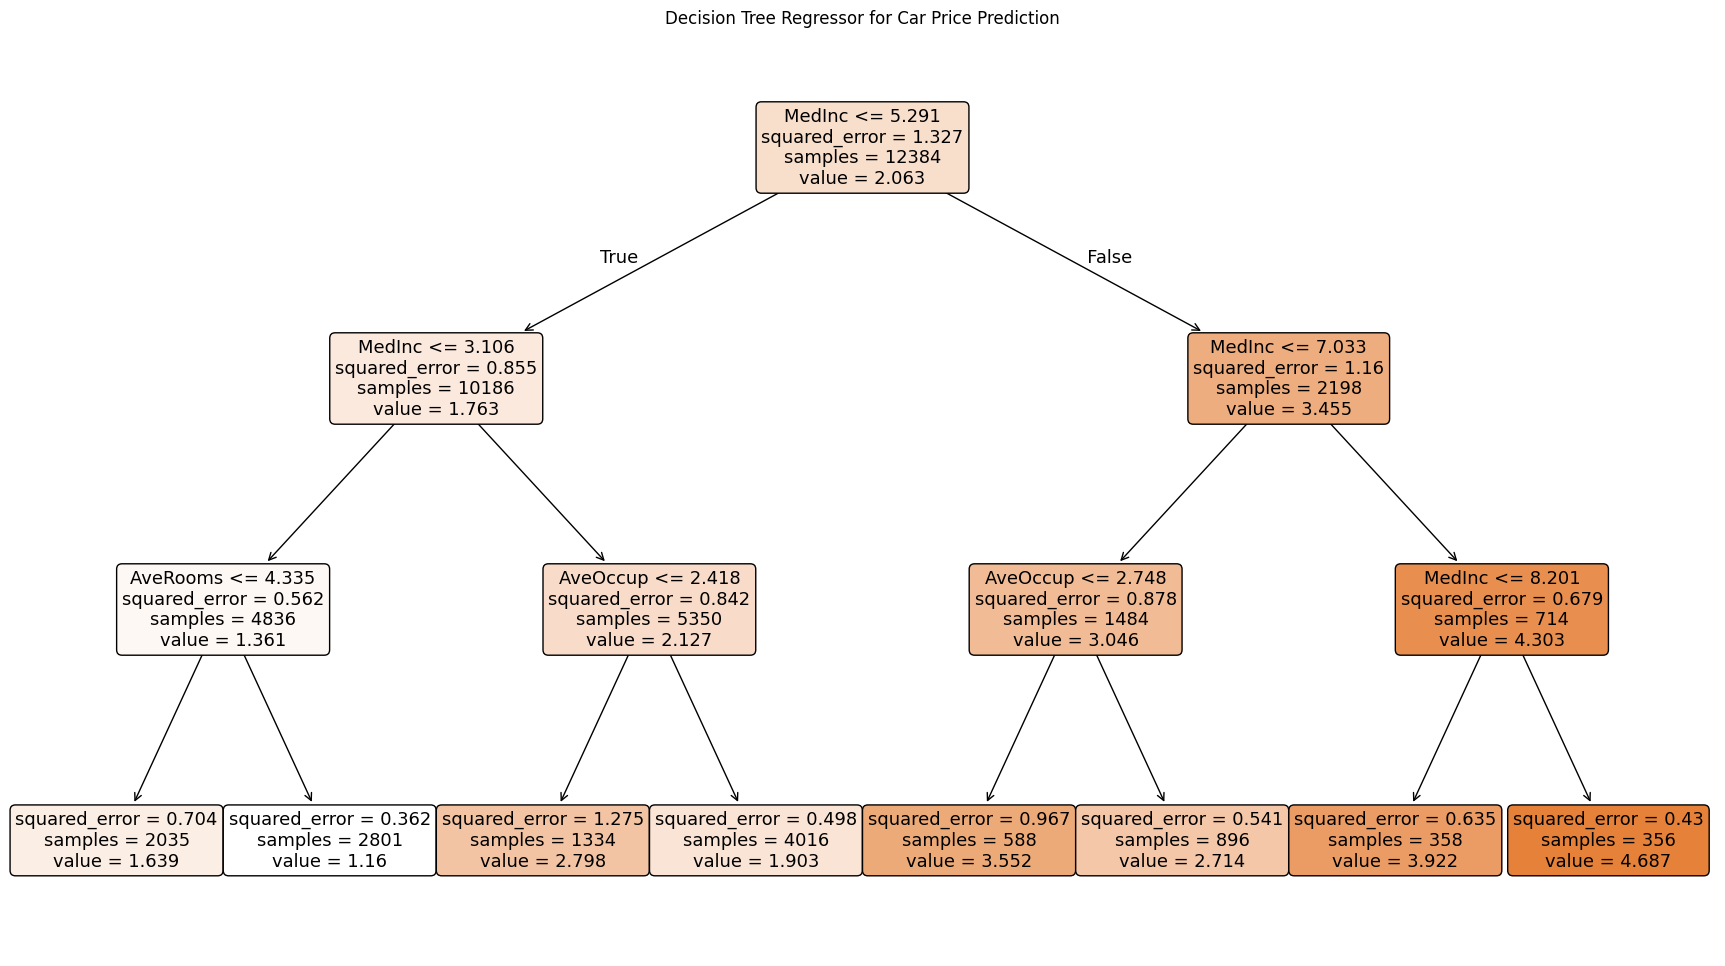

In [419]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(
    reg,
    feature_names=X.columns,
    filled=True,
    rounded=True
    )
plt.title("Decision Tree Regressor for Car Price Prediction")
plt.show()


In [420]:
reg.get_depth()


3

In [421]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
10924,3.7500,36.0,5.202105,1.048421,2594.0,5.461053,33.73,-117.88
9976,5.3698,20.0,5.340206,1.041237,589.0,3.036082,38.60,-122.47
5066,1.1645,44.0,5.151943,1.151943,1159.0,4.095406,33.99,-118.30
6840,2.0250,43.0,4.303279,1.032787,820.0,3.360656,34.07,-118.12


In [422]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([1.63856423, 1.15978366, 2.79826313, ..., 1.15978366, 1.63856423,
       1.15978366], shape=(8256,))

In [423]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred_test)

0.5115843263901174

## Overfitting Demonstration (Very Important)

Let’s check training vs test error.

In [424]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, reg.predict(X_train))
test_mse  = mean_squared_error(Y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.6122983892616992
Test MSE: 0.6538445467426518


#### Since training and testing MSE values are close, the model does not show signs of overfitting and generalizes well to unseen data.

## Cost–Complexity Pruning (CART Way)
Step 1: Get α values

In [425]:
path = reg.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00843885 0.02015645 0.02181742 0.06153909 0.06474713
 0.12012526 0.41759125]


## HyperParameter Tuning 

In [ ]:
# Hyperparameter Tuning - Finding the best alpha

parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [2, 3, 4, 5, 6 , 7, 8, 9, 10],
    'splitter': ['best', 'random'],
    'max_features': [None, 'auto', 'sqrt', 'log2']
    }

regression = DecisionTreeRegressor()

In [428]:
from sklearn.model_selection import GridSearchCV

reg_cv = GridSearchCV(regression, param_grid=parameters, cv=5 , scoring='r2')

In [429]:
reg_cv.fit(X_train, Y_train)

c:\Users\hb292\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hb292\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hb292\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 3, ...], 'max_features': [None, 'auto', ...], 'splitter': ['best', 'random']}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [435]:
reg_cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': None,
 'splitter': 'best'}

In [436]:
Y_predict_cv = reg_cv.predict(X_test)

In [438]:
r2_score(Y_test, Y_predict_cv)

0.6640706286453741

In this, `GridSearchCV` is used to find the best hyperparameters of the model by performing cross-validation.